# Introduction

_Zalay, O., Bontempi, D., Bitterman, D. S., et Al. - Deep learning estimates of biological age from face photographs predict clinical outcomes_.

This notebook contains the code for replicating some of the figures in the Extended Data document.

Any small difference in the quantitative results is due to a difference between the versions of the dependencies used to conduct the final analysis in the paper, and the version of such dependencies on Google Colab.

Other differences in the plots appearance are due to the fact the figure in the Extended Data were exported with R, while the following is the closest we could get using only Python code.

**Note: the following cell is temporary, and will be updated upon publication.**

The updated version will handle the download of the the output data shared with the project GitHub repository (reproducible with the `data_processing_demo.ipynb` notebook), so that this notebook will be freely executable by everyone.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

PROJECT_PATH = "/content/gdrive/MyDrive/AIM/Projects/FaceAge"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
import os

import numpy as np
import pandas as pd

import scipy.stats

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#%config InlineBackend.figure_format = 'png'
%config InlineBackend.figure_format = 'svg'

sns.set_style(style = "whitegrid",
              rc = {"font.family": "serif",
                    "font.serif": "Times New Roman"})

---

# Data Viz

Let us inspect the results of the age estimation model (and thus of the whole FaceAge pipeline) - reproducible by running the `data_processing_demo.ipynb` notebook.

The predicted quantity `faceage` should reflect the biologic age of the subject. All the other information are functional to the analyses in the notebook (e.g., performance evaluation per gender).

In [4]:
BASE_OUTPUT_PATH = os.path.join(PROJECT_PATH, "outputs")

res_file_name = 'utk_hi-res_qa_res.csv'
res_file_path = os.path.join(BASE_OUTPUT_PATH, res_file_name) 
age_pred_df = pd.read_csv(res_file_path)

age_pred_df.head()

,subj_id,faceage,age,gender,race
0,20170110153238490,75.026596,74,1,0
1,20170109213056053,28.754328,21,1,2
2,20170117012906285,48.943573,38,0,1
3,20170117151304315,30.146166,30,1,0
4,20170116200714834,45.974422,26,0,1


---

## Overall

Let us validate the model performance by looking at the FaceAge/Age scatterplot.

The UTK dataset is composed by "faces in the wild". We assume the subjects in the dataset are healthy and all the labels are correct*, and evaluate how accurate the age prediction is (by computing the Pearson correlation coefficient, and the mean absolute error).

*_since the UTK dataset contains numerous labelling errors and there is no guarantee all the subjects in the dataset are healty, the aim of this validation is to make sure the model is working sufficiently well on high-quality images before moving on to the clinical evaluation._

In [5]:
r, pval = scipy.stats.pearsonr(age_pred_df["age"].values,
                               age_pred_df["faceage"].values)

pval_str = "%g"%(pval) if pval > 0.0001 else "p < 0.0001"

mae = np.mean(np.abs(age_pred_df["age"].values - age_pred_df["faceage"].values))

text_str = "N = %g\nr = %g (pval = %s)\nMAE = %g"%(len(age_pred_df), r, pval_str, mae)

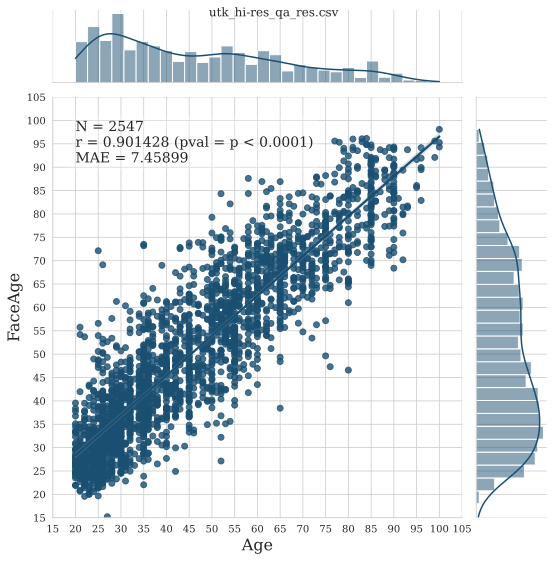

In [6]:
p = sns.jointplot(x = "age", y = "faceage", data = age_pred_df,
                  kind = "reg",
                  color = "#1B4F72",
                  ratio = 5,
                  marginal_kws = dict(bins = 30),
                  xlim = (15, 105),
                  ylim = (15, 105))

p.set_axis_labels(xlabel = "Age", ylabel = "FaceAge", size = 16)
p.fig.set_figwidth(8)
p.fig.set_figheight(8)
p.fig.suptitle(res_file_name)

p.ax_joint.text(20, 100, text_str,
                bbox = {"facecolor" : "white",
                        "alpha" : .25},
                fontsize = 14,
                verticalalignment = 'top')

p.ax_joint.set_xticks(np.linspace(15, 105, 19))
_ = p.ax_joint.set_yticks(np.linspace(15, 105, 19))

---

## Female Subjects

Let us now do the same, but for female subjects only.

The reason behind the analysis is to make sure the model performance is as unbiased as possible with respect to the subject gender.

In [7]:
age_pred_df_f = age_pred_df[age_pred_df["gender"] == 1]


r, pval = scipy.stats.pearsonr(age_pred_df_f["age"].values,
                               age_pred_df_f["faceage"].values)

pval_str = "%g"%(pval) if pval > 0.0001 else "p < 0.0001"

mae = np.mean(np.abs(age_pred_df_f["age"].values - age_pred_df_f["faceage"].values))

text_str = "N = %g\nr = %g (pval = %s)\nMAE = %g"%(len(age_pred_df_f), r, pval_str, mae)

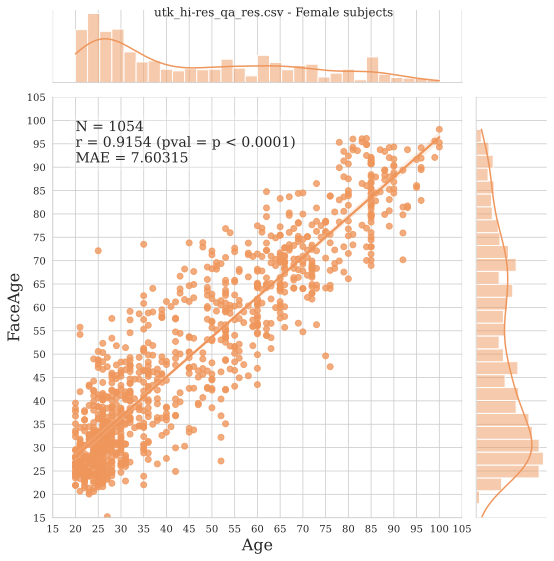

In [8]:
p = sns.jointplot(x = "age", y = "faceage", data = age_pred_df_f,
                  kind = "reg",
                  color = "#EE965C",
                  ratio = 5,
                  marginal_kws = dict(bins = 30),
                  xlim = (15, 105),
                  ylim = (15, 105))

p.set_axis_labels(xlabel = "Age", ylabel = "FaceAge", size = 16)
p.fig.set_figwidth(8)
p.fig.set_figheight(8)
p.fig.suptitle(res_file_name + " - Female subjects")

p.ax_joint.text(20, 100, text_str,
                bbox = {"facecolor" : "white",
                        "alpha" : .25},
                fontsize = 14,
                verticalalignment = 'top')

p.ax_joint.set_xticks(np.linspace(15, 105, 19))
_ = p.ax_joint.set_yticks(np.linspace(15, 105, 19))

---

## Male Subjects

Let us now do the same, but for male subjects only.

In [9]:
age_pred_df_m = age_pred_df[age_pred_df["gender"] == 0]


r, pval = scipy.stats.pearsonr(age_pred_df_m["age"].values,
                               age_pred_df_m["faceage"].values)

pval_str = "%g"%(pval) if pval > 0.0001 else "p < 0.0001"

mae = np.mean(np.abs(age_pred_df_m["age"].values - age_pred_df_m["faceage"].values))

text_str = "N = %g\nr = %g (pval = %s)\nMAE = %g"%(len(age_pred_df_m), r, pval_str, mae)

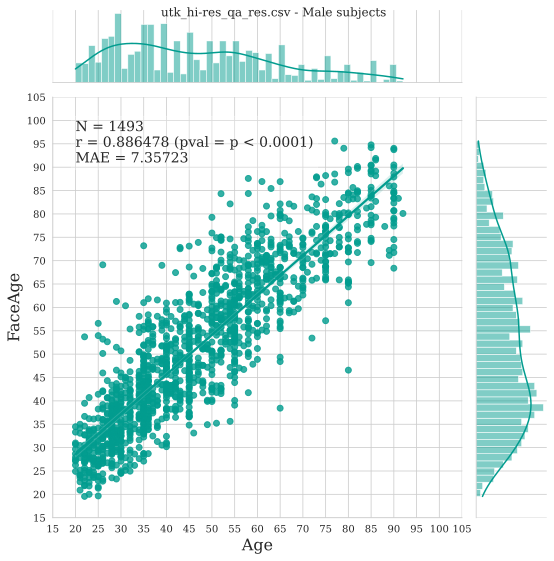

In [10]:
p = sns.jointplot(x = "age", y = "faceage", data = age_pred_df_m,
                  kind = "reg",
                  color = "#029c8f",
                  ratio = 5,
                  marginal_kws = dict(bins = 50),
                  xlim = (15, 105),
                  ylim = (15, 105))

p.set_axis_labels(xlabel = "Age", ylabel = "FaceAge", size = 16)
p.fig.set_figwidth(8)
p.fig.set_figheight(8)
p.fig.suptitle(res_file_name + " - Male subjects")

p.ax_joint.text(20, 100, text_str,
                bbox = {"facecolor" : "white",
                        "alpha" : .25},
                fontsize = 14,
                verticalalignment = 'top')

p.ax_joint.set_xticks(np.linspace(15, 105, 19))
_ = p.ax_joint.set_yticks(np.linspace(15, 105, 19))